**Importing libraries:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score


**Load the cleaned train data:**

In [2]:
df = pd.read_csv('../data/train_clean.csv')


**Describe the basic format:**

In [3]:
df.shape


(2048, 36)

In [4]:
df.dtypes


Unnamed: 0        int64
ms_subclass       int64
ms_zoning         int64
street            int64
alley             int64
land_contour      int64
utilities         int64
lot_config        int64
neighborhood      int64
condition_1       int64
bldg_type         int64
house_style       int64
overall_qual      int64
exter_qual        int64
foundation        int64
bsmt_cond         int64
heating_qc        int64
central_air       int64
bsmt_full_bath    int64
bsmt_half_bath    int64
full_bath         int64
half_bath         int64
bedroom_abvgr     int64
kitchen_abvgr     int64
totrms_abvgrd     int64
functional        int64
fireplaces        int64
garage_type       int64
garage_cars       int64
garage_qual       int64
paved_drive       int64
enclosed_porch    int64
pool_area         int64
mo_sold           int64
yr_sold           int64
saleprice         int64
dtype: object

**Looks like an extra column has been added, column Unnamed: 0  will be dropped.**

In [5]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)


,ms_subclass,ms_zoning,street,alley,land_contour,utilities,lot_config,neighborhood,condition_1,bldg_type,...,fireplaces,garage_type,garage_cars,garage_qual,paved_drive,enclosed_porch,pool_area,mo_sold,yr_sold,saleprice
0,60,0,0,0,0,0,2,11,1,0,...,0,1,2,1,1,0,0,3,2010,130500
1,60,0,0,0,0,0,2,10,0,0,...,1,1,2,1,1,0,0,4,2009,220000
2,20,0,0,0,0,0,1,0,0,0,...,0,2,1,1,1,0,0,1,2010,109000
3,60,0,0,0,0,0,1,23,0,0,...,0,3,2,1,1,0,0,4,2010,174000
4,50,0,0,0,0,0,1,10,0,0,...,0,2,2,1,0,0,0,3,2010,138500


**Create our features matrix for the Train/Test Split Model**

In [6]:
features = ['ms_subclass',
            'ms_zoning',
            'street', 
            'alley',
            'land_contour',      
            'utilities',         
            'lot_config',        
            'neighborhood',      
            'condition_1',       
            'bldg_type',         
            'house_style',       
            'overall_qual',      
            'exter_qual',        
            'foundation',        
            'bsmt_cond',         
            'heating_qc',        
            'central_air',       
            'bsmt_full_bath',    
            'bsmt_half_bath',    
            'full_bath',         
            'half_bath',         
            'bedroom_abvgr',     
            'kitchen_abvgr',     
            'totrms_abvgrd',     
            'functional',        
            'fireplaces',        
            'garage_type',       
            'garage_cars',       
            'garage_qual',       
            'paved_drive',       
            'enclosed_porch',  
            'pool_area',         
            'mo_sold',           
            'yr_sold']
X = df[features]


In [7]:
y = df['saleprice']


**Train/Test Split for RidgeCV, LassoCV, Linear Regression Model Comparison**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1638, 34) (1638,)
(410, 34) (410,)


**Prep Models: Scaling**

- Since we're using Lasso and Ridge, we'll want to scale our features. In the cell below, fit a StandardScaler to X_train and use it to transform both X_train and X_test.

In [10]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


**Prep Models: Instantiate our models**
- We'll be evaluating LinearRegression, LassoCV and RidgeCV, so we'll need to create instances of all three models.

In [11]:
lr = LinearRegression()


In [12]:
lasso = LassoCV(n_alphas=200)


In [13]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))


**Cross validation of Models**

In [14]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()


0.7915642444123869

In [15]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.793727314625804

In [16]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()


0.7946369545902549

**Ridge Model Fitting and Evaluation**
- RidgeCV seems to be doing the best, so let's move forward with that model. Fit the model to the training data, and evaluate the training and test scores below.

In [17]:
ridge.fit(X_train, y_train)


RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [18]:
ridge.score(X_train, y_train)


0.806819054651507

In [19]:
ridge.score(X_test, y_test)


0.7560272596997959

In [20]:
ridge_scores.mean()


0.7946369545902549

In [21]:
pred = ridge.predict(X_test)


In [22]:
r2_score(y_test, pred)


0.7560272596997959

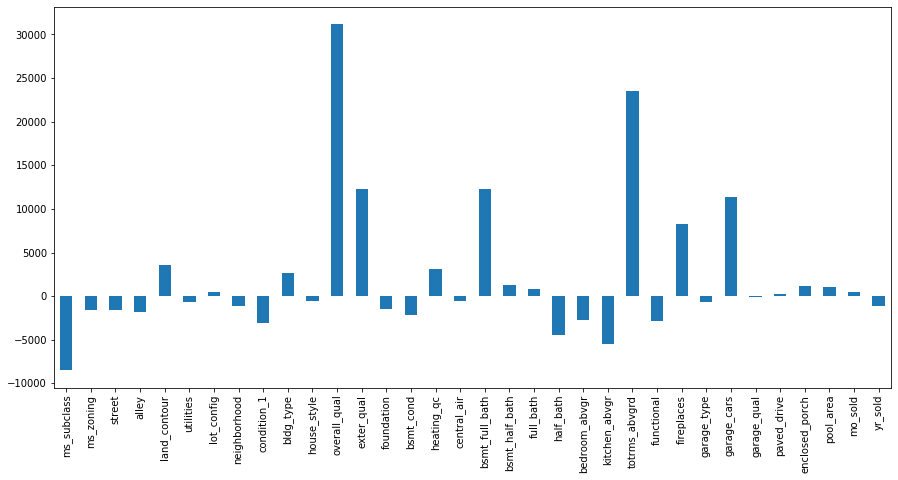

In [23]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))
